#  Rocky and water-rich planet bulk density models by Zeng (2019)
Create the fits table files for the Zeng2019 rocky and water-rich planet bulk density models

In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.units as u
import astropy.io.fits as pf
import pandas as pd

from scipy.interpolate import interp1d

mearth = (5.9742e24 * u.kg).to(u.g).value
rearth = (6.371e6 * u.m).to(u.cm).value

nr = 200

def rho(r, m):
    return m/(4/3*pi*r**3)

In [3]:
mr = pd.read_csv('mrtable3.txt', delim_whitespace=True, header=0, skiprows=[1], index_col=0)
mr.index.name = 'mass'
mr.drop(['cold_h2/he', 'max_coll_strip'], axis=1, inplace=True)
md = pd.DataFrame(rho(mr.values * rearth, mr.index.values[:, newaxis] * mearth))
md.columns = mr.columns
md.set_index(mr.index, inplace=True)

models = mr.columns.values.copy()
nm = models.size

radius = linspace(0.5, 3.5, nr)
r0, dr = radius[0], radius[1] - radius[0]
xr0, dxr = 0.0, 0.05
xw0, dxw = 0.05, 0.05

density = zeros((nm, nr))
for i in range(nm):
    ip = interp1d(mr.iloc[:, i].values, md.iloc[:, i].values, 1, bounds_error=False)
    density[i] = ip(radius)
drocky = density[:21][::-1]
dwater = density[21:]

In [4]:
hdu = pf.PrimaryHDU(drocky)
hdu.header['CTYPE1'] = 'radius'
hdu.header['CRPIX1'] = 1
hdu.header['CRVAL1'] = r0
hdu.header['CDELT1'] = dr
hdu.header['CTYPE2'] = 'xrock'
hdu.header['CRPIX2'] = 1
hdu.header['CRVAL2'] = xr0
hdu.header['CDELT2'] = dxr
hdu.writeto('rocky_zeng19.fits', overwrite=True)

In [5]:
hdu = pf.PrimaryHDU(dwater)
hdu.header['CTYPE1'] = 'radius'
hdu.header['CRPIX1'] = 1
hdu.header['CRVAL1'] = r0
hdu.header['CDELT1'] = dr
hdu.header['CTYPE2'] = 'xwater'
hdu.header['CRPIX2'] = 1
hdu.header['CRVAL2'] = xw0
hdu.header['CDELT2'] = dxw
hdu.writeto('water_zeng19.fits', overwrite=True)

In [1]:
from spright.rdmodel import RadiusDensityModel
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
rdm = RadiusDensityModel(water='a21')

In [3]:
r = linspace(0.5, 4)

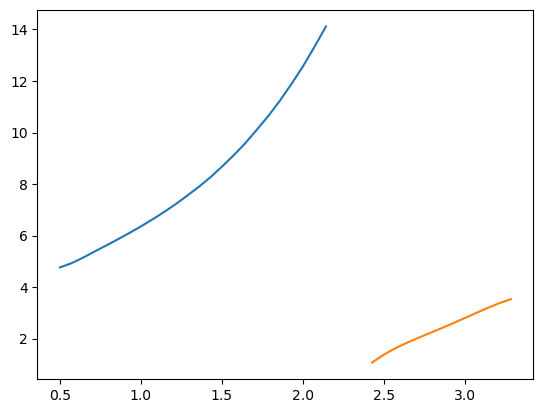

In [8]:
plot(r, rdm.evaluate_rocky(0.5, r))
plot(r, rdm.evaluate_water(0.8, r))